In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reproducibility
np.random.seed(42)

# Generate 2 features (X1, X2)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.hstack([X1, X2])

# True coefficients: y = 3*X1 + 5*X2 + 2 + noise
y = 3 * X1 + 5 * X2 + 2 + np.random.randn(100, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(np.shape(y_test))

(20, 1)


In [4]:
# Add bias term (intercept)
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # shape (80, 3)

# Closed-form solution: theta = (X^T X)^-1 X^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

print("Theta (intercept, coef_1, coef_2):", theta_best.ravel())

Theta (intercept, coef_1, coef_2): [1.91236071 2.84816065 5.21885741]


In [13]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # shape (80, 3)
y_pred = X_test_b.dot(theta_best)

In [14]:
from sklearn.metrics import mean_squared_error
print("MSE (NumPy LR):", mean_squared_error(y_test, y_pred))

MSE (NumPy LR): 0.8016734323853439


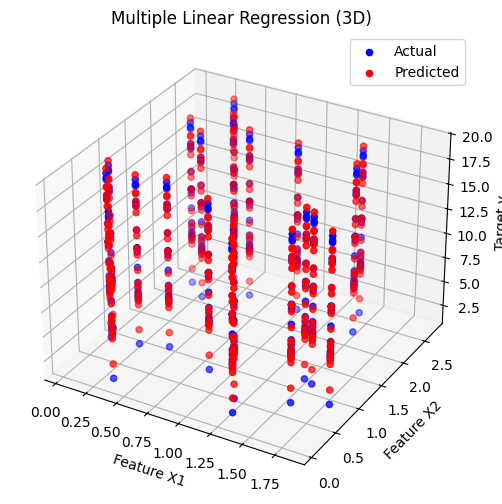

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted')

ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target y")
ax.set_title("Multiple Linear Regression (3D)")
ax.legend()
plt.show()


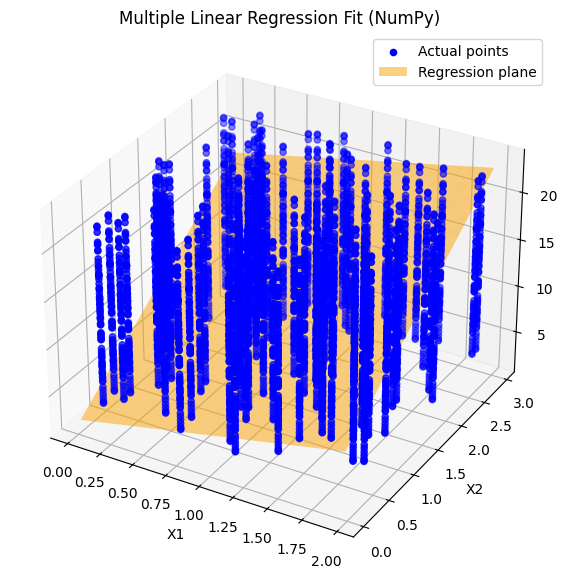

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have these from your previous code:
# X_train (shape: (n_samples, 2)), y_train (shape: (n_samples, 1))
# theta_best from NumPy closed form: shape (3, 1) --> [intercept, coef1, coef2]

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Actual points')

# Create a mesh grid for the plane
x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 20)
x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calculate predicted y for each (x1, x2) on the grid using theta_best
# theta_best shape: (3, 1) -> intercept + coef1*x1 + coef2*x2
y_grid = (theta_best[0] + theta_best[1]*x1_grid + theta_best[2]*x2_grid).reshape(x1_grid.shape)

# Plot regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='orange', alpha=0.5, label='Regression plane')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Regression Fit (NumPy)')

plt.legend()
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)
print("MSE (Sklearn LR):", mean_squared_error(y_test, lin_reg.predict(X_test)))


Intercept: [1.91236071]
Coefficients: [[2.84816065 5.21885741]]
MSE (Sklearn LR): 0.8016734323853427


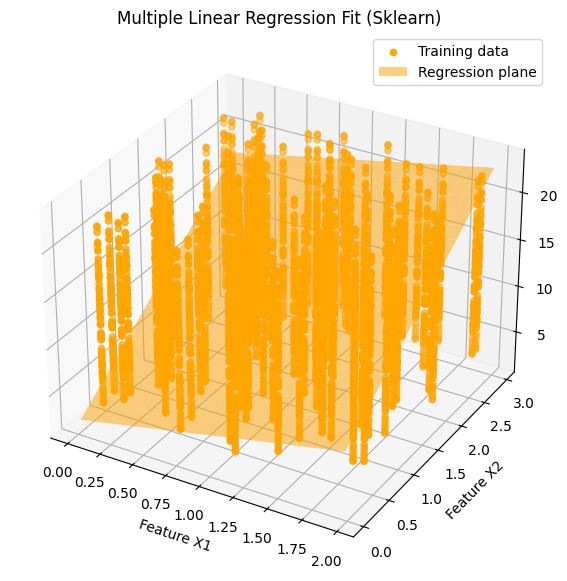

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Assume you have lin_reg (fitted sklearn model) and X_train, y_train

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot training points
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='orange', label='Training data')

# Create grid to plot the regression plane
x1_grid, x2_grid = np.meshgrid(
    np.linspace(X_train[:,0].min(), X_train[:,0].max(), 20),
    np.linspace(X_train[:,1].min(), X_train[:,1].max(), 20)
)

# Predict y for each (x1, x2) pair in the grid
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid_pred = lin_reg.predict(X_grid).reshape(x1_grid.shape)

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, color='orange', alpha=0.5, label='Regression plane')

ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Target y')
ax.set_title('Multiple Linear Regression Fit (Sklearn)')

plt.legend()
plt.show()
